- Main

Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Set Seed for Reproducibility

In [22]:
# reproducibility
seed = 42
rng = np.random.default_rng(seed)

Set Users(N) and Resource Blocks(K)

In [23]:
N = 10
K = 50

Randomly create C matrix

In [24]:
# Δημιουργία πίνακα C (π.χ. ανεξάρτητες Exp(1) ή Normal, ό,τι θες)
# Εδώ χρησιμοποιώ θετικές τιμές (π.χ. Rayleigh-like) ώστε rate ∝ C
C = rng.random((N, K))  # ομοιόμορφα [0,1)
# ή π.χ. C = rng.exponential(scale=1.0, size=(N,K))

Max C/I  Algorithm (greedy ανά RB)
Find for each Resource Block the User with best Quality ( max C value)

In [25]:
assignment = np.argmax(C, axis=0)  # length K, indices χρηστών 0..N-1

for k, user in enumerate(assignment):
    print(f"RB {k}: assigned to user {user}")

RB 0: assigned to user 2
RB 1: assigned to user 4
RB 2: assigned to user 0
RB 3: assigned to user 2
RB 4: assigned to user 8
RB 5: assigned to user 0
RB 6: assigned to user 9
RB 7: assigned to user 8
RB 8: assigned to user 9
RB 9: assigned to user 8
RB 10: assigned to user 7
RB 11: assigned to user 0
RB 12: assigned to user 9
RB 13: assigned to user 8
RB 14: assigned to user 5
RB 15: assigned to user 2
RB 16: assigned to user 3
RB 17: assigned to user 9
RB 18: assigned to user 4
RB 19: assigned to user 3
RB 20: assigned to user 6
RB 21: assigned to user 2
RB 22: assigned to user 0
RB 23: assigned to user 4
RB 24: assigned to user 6
RB 25: assigned to user 4
RB 26: assigned to user 7
RB 27: assigned to user 3
RB 28: assigned to user 3
RB 29: assigned to user 5
RB 30: assigned to user 8
RB 31: assigned to user 0
RB 32: assigned to user 4
RB 33: assigned to user 6
RB 34: assigned to user 4
RB 35: assigned to user 7
RB 36: assigned to user 2
RB 37: assigned to user 7
RB 38: assigned to use

Calculate Rate for each resource block using the channel quality value of the assigned user.

Rate proportional to C, rate = a * C. Using a = 1.

In [26]:
rates_per_rb = C[assignment, np.arange(K)]

for k in range(K):
    print(f"RB {k}: rate = {rates_per_rb[k]:.2f}")

RB 0: rate = 0.91
RB 1: rate = 0.97
RB 2: rate = 0.86
RB 3: rate = 0.97
RB 4: rate = 1.00
RB 5: rate = 0.98
RB 6: rate = 0.98
RB 7: rate = 0.84
RB 8: rate = 0.78
RB 9: rate = 1.00
RB 10: rate = 0.93
RB 11: rate = 0.93
RB 12: rate = 0.95
RB 13: rate = 0.90
RB 14: rate = 0.92
RB 15: rate = 0.86
RB 16: rate = 0.83
RB 17: rate = 0.94
RB 18: rate = 0.93
RB 19: rate = 0.95
RB 20: rate = 0.92
RB 21: rate = 0.65
RB 22: rate = 0.97
RB 23: rate = 0.96
RB 24: rate = 0.85
RB 25: rate = 0.92
RB 26: rate = 0.94
RB 27: rate = 0.99
RB 28: rate = 0.89
RB 29: rate = 0.85
RB 30: rate = 0.93
RB 31: rate = 0.97
RB 32: rate = 0.97
RB 33: rate = 0.86
RB 34: rate = 0.93
RB 35: rate = 0.99
RB 36: rate = 0.96
RB 37: rate = 0.95
RB 38: rate = 0.78
RB 39: rate = 0.94
RB 40: rate = 0.94
RB 41: rate = 0.96
RB 42: rate = 0.94
RB 43: rate = 0.83
RB 44: rate = 0.84
RB 45: rate = 0.90
RB 46: rate = 0.98
RB 47: rate = 0.87
RB 48: rate = 0.78
RB 49: rate = 0.96


Total Rate per User

In [27]:
total_rate_per_user = np.zeros(N)

for k, user in enumerate(assignment):
    total_rate_per_user[user] += rates_per_rb[k]

for user in range(N):
    print(f"User {user}: total rate = {total_rate_per_user[user]:.2f}")

User 0: total rate = 4.70
User 1: total rate = 0.96
User 2: total rate = 6.06
User 3: total rate = 6.31
User 4: total rate = 5.68
User 5: total rate = 4.30
User 6: total rate = 4.52
User 7: total rate = 3.81
User 8: total rate = 5.64
User 9: total rate = 3.65


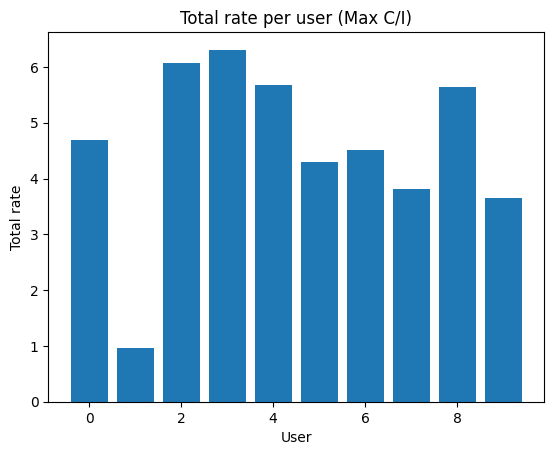

In [28]:
import matplotlib.pyplot as plt

plt.bar(range(N), total_rate_per_user)
plt.xlabel("User")
plt.ylabel("Total rate")
plt.title("Total rate per user (Max C/I)")
plt.show()

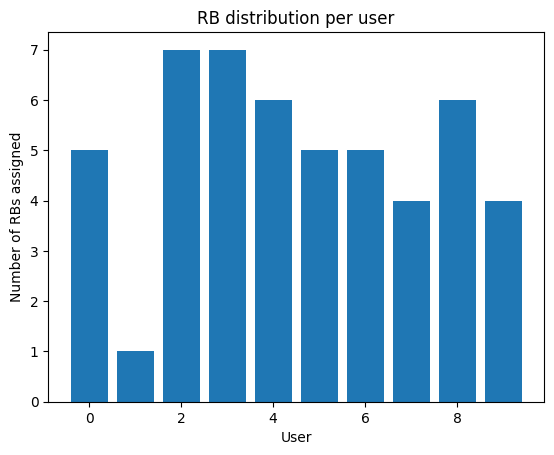

In [29]:
rb_count_per_user = np.zeros(N, dtype=int)
for u in assignment:
    rb_count_per_user[u] += 1

plt.bar(range(N), rb_count_per_user)
plt.xlabel("User")
plt.ylabel("Number of RBs assigned")
plt.title("RB distribution per user")
plt.show()

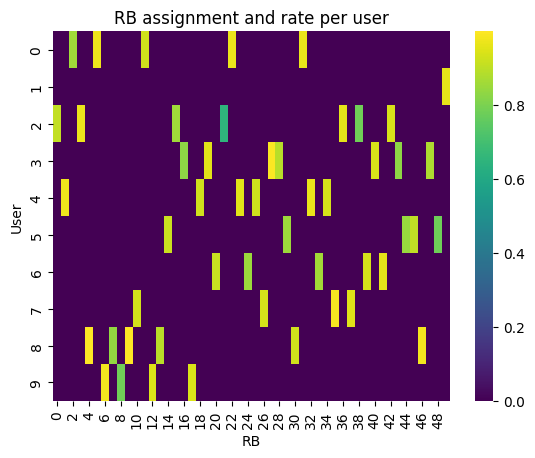

In [31]:
import seaborn as sns

# Create matrix for visualization: rows=users, columns=RBs, 0 if not assigned
visual = np.zeros((N, K))
for k, user in enumerate(assignment):
    visual[user, k] = rates_per_rb[k]

sns.heatmap(visual, annot=False, cmap="viridis")
plt.xlabel("RB")
plt.ylabel("User")
plt.title("RB assignment and rate per user")
plt.show()

In [10]:
total_rate = np.sum(rates_per_rb)
# rates ανά χρήστη (άθροισμα C των blocks που του ανατέθηκαν)

user_rates = np.zeros(N)
for j, i in enumerate(assignment):
    user_rates[i] += C[i, j]

# Metrics
jain_index = (np.sum(user_rates)**2) / (N * np.sum(user_rates**2))

print(f"Total rate: {total_rate:.4f}")
print(f"Jain's fairness index: {jain_index:.4f}")


Total rate: 45.6250
Jain's fairness index: 0.9038


N = 10
total_rate_per_user = np.zeros(N)

for k, user in enumerate(assignment):
    total_rate_per_user[user] += rates_per_rb[k]

for user in range(N):
    print(f"User {user}: total rate = {total_rate_per_user[user]:.2f}")
# -- PLOTS

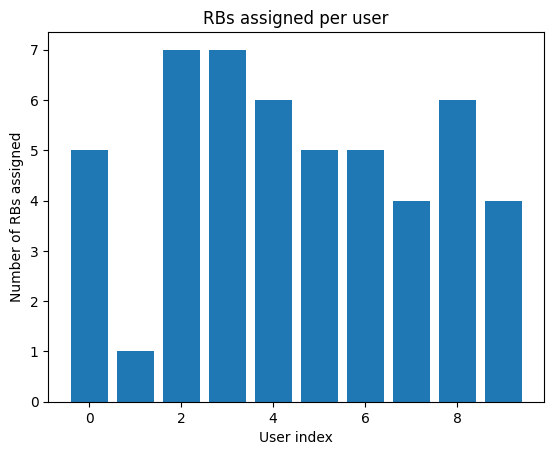

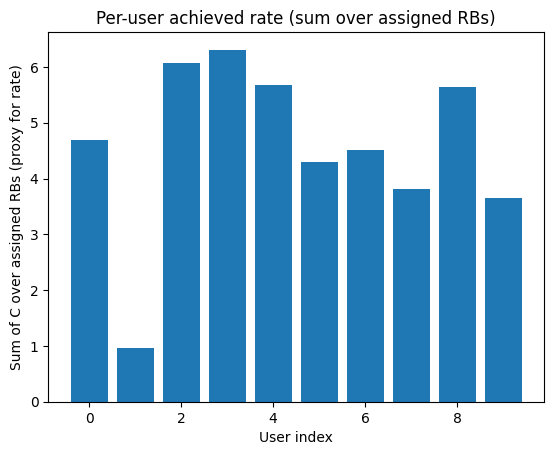

In [3]:
plt.figure()
# 1) bar: πόσα blocks πήρε κάθε χρήστης
counts = np.bincount(assignment, minlength=N)
plt.bar(np.arange(N), counts)
plt.xlabel("User index")
plt.ylabel("Number of RBs assigned")
plt.title("RBs assigned per user")

plt.figure()
# 2) bar: συνολικό rate ανά χρήστη
plt.bar(np.arange(N), user_rates)
plt.xlabel("User index")
plt.ylabel("Sum of C over assigned RBs (proxy for rate)")
plt.title("Per-user achieved rate (sum over assigned RBs)")

plt.show()